In [1]:
#Data Visualization Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", color_codes=True)
import numpy as np
import plotly.express as px
from collections import Counter

In [2]:
#ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv("C:\\Users\\caiob\\OneDrive\\Desktop\\RunWiser\\fitness_tracker_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  int64  
 1   date                1000000 non-null  object 
 2   steps               1000000 non-null  int64  
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  int64  
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  int64  
 8   workout_type        856880 non-null   object 
 9   weather_conditions  1000000 non-null  object 
 10  location            1000000 non-null  object 
 11  mood                1000000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 91.6+ MB


In [4]:
df = df.drop(columns=['user_id', 'location', 'date'])

In [5]:
df['workout_type'] = df['workout_type'].fillna('No Workout')

In [6]:
numeric_cols = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg']
for col in numeric_cols:
    df = df[df[col] >= 0]

In [7]:
standard_scaler = StandardScaler()

In [8]:
df_standardized = df.copy()
df_standardized[numeric_cols] = standard_scaler.fit_transform(df_standardized[numeric_cols])

In [9]:
continuous_vars = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg']
print("Descriptive Statistics for Continuous Variables:")
print(df[continuous_vars].describe())

Descriptive Statistics for Continuous Variables:
                steps  calories_burned     distance_km  active_minutes  \
count  1000000.000000   1000000.000000  1000000.000000  1000000.000000   
mean     15005.767061      2750.008148        9.994465      719.418241   
std       8659.195341       721.473950        5.774298      415.894771   
min          0.000000      1500.000000        0.000000        0.000000   
25%       7492.000000      2125.517500        4.990000      359.000000   
50%      15020.000000      2748.310000        9.990000      719.000000   
75%      22507.000000      3375.190000       14.990000     1080.000000   
max      29999.000000      4000.000000       20.000000     1439.000000   

          sleep_hours  heart_rate_avg  
count  1000000.000000  1000000.000000  
mean         6.000228      119.458316  
std          3.463977       34.654034  
min          0.000000       60.000000  
25%          3.000000       89.000000  
50%          6.000000      119.000000  
75% 

In [10]:
categorical_vars = ['workout_type', 'weather_conditions', 'mood']
for var in categorical_vars:
    print(f"\nValue Counts for '{var}':")
    print(df[var].value_counts())


Value Counts for 'workout_type':
workout_type
No Workout     143120
Cycling        143115
Gym Workout    143108
Running        142774
Walking        142668
Swimming       142627
Yoga           142588
Name: count, dtype: int64

Value Counts for 'weather_conditions':
weather_conditions
Fog      250417
Rain     250059
Clear    249807
Snow     249717
Name: count, dtype: int64

Value Counts for 'mood':
mood
Happy       250654
Stressed    250207
Neutral     249843
Tired       249296
Name: count, dtype: int64


In [11]:
corr_matrix = df[continuous_vars].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                    steps  calories_burned  distance_km  active_minutes  \
steps            1.000000         0.000039     0.000752       -0.000199   
calories_burned  0.000039         1.000000    -0.000019        0.000416   
distance_km      0.000752        -0.000019     1.000000        0.001858   
active_minutes  -0.000199         0.000416     0.001858        1.000000   
sleep_hours     -0.000902        -0.001989     0.000385       -0.000442   
heart_rate_avg  -0.001565        -0.000288    -0.000103        0.001320   

                 sleep_hours  heart_rate_avg  
steps              -0.000902       -0.001565  
calories_burned    -0.001989       -0.000288  
distance_km         0.000385       -0.000103  
active_minutes     -0.000442        0.001320  
sleep_hours         1.000000       -0.000300  
heart_rate_avg     -0.000300        1.000000  


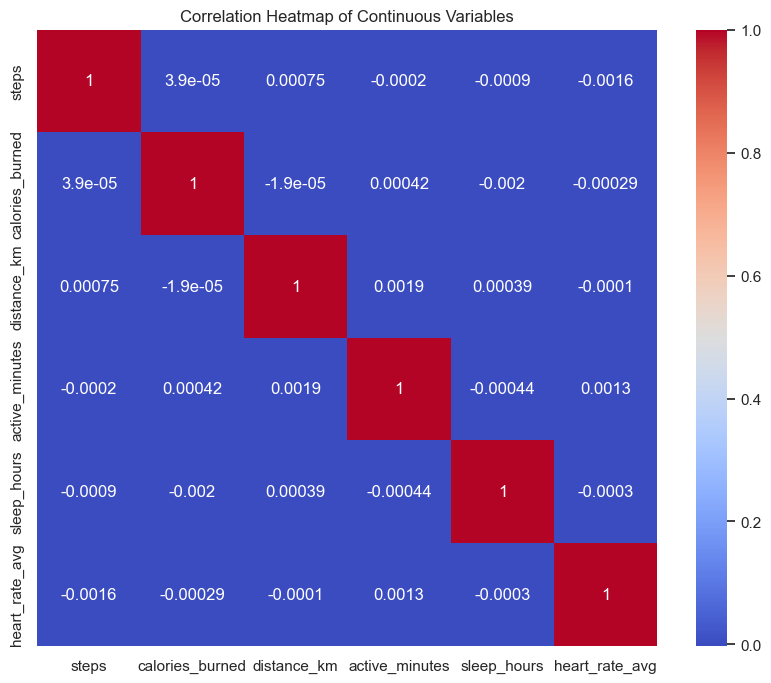

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

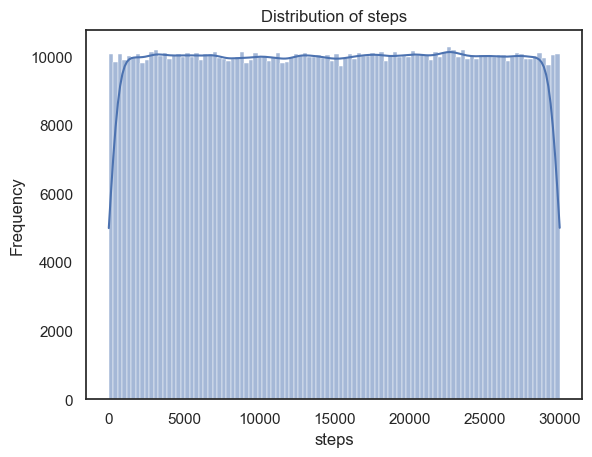

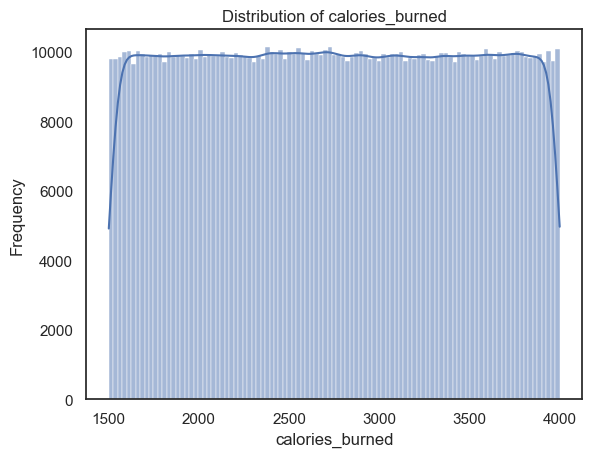

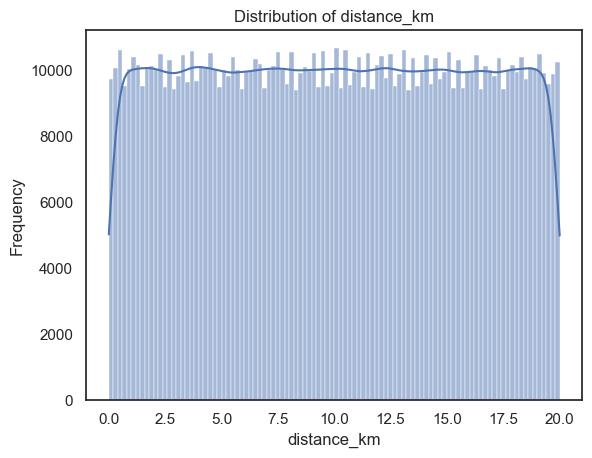

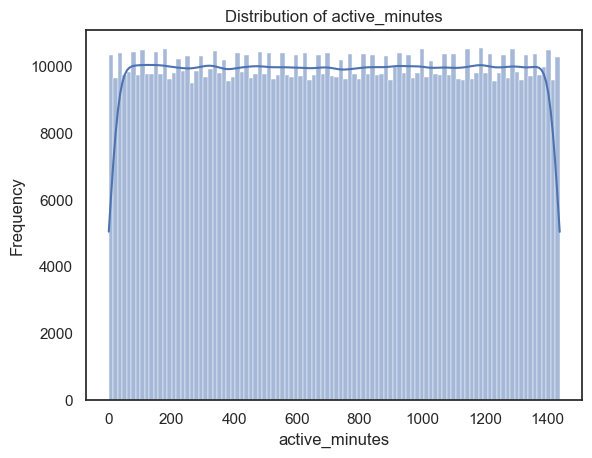

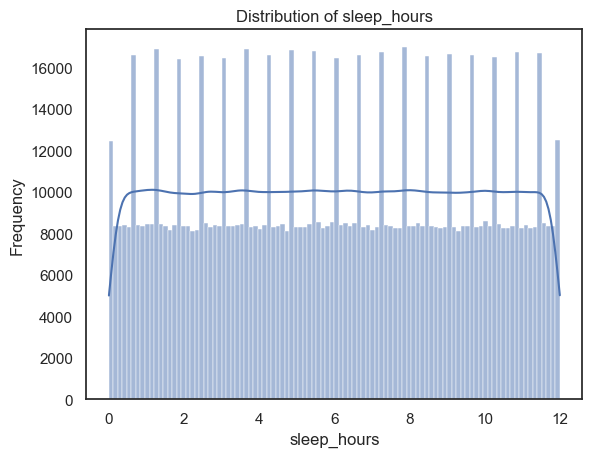

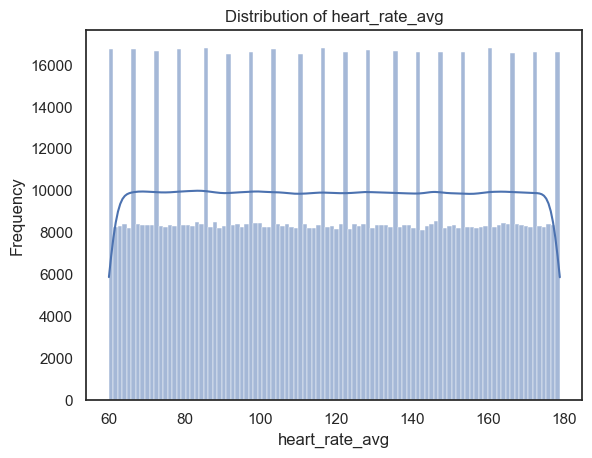

In [13]:
for col in continuous_vars:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

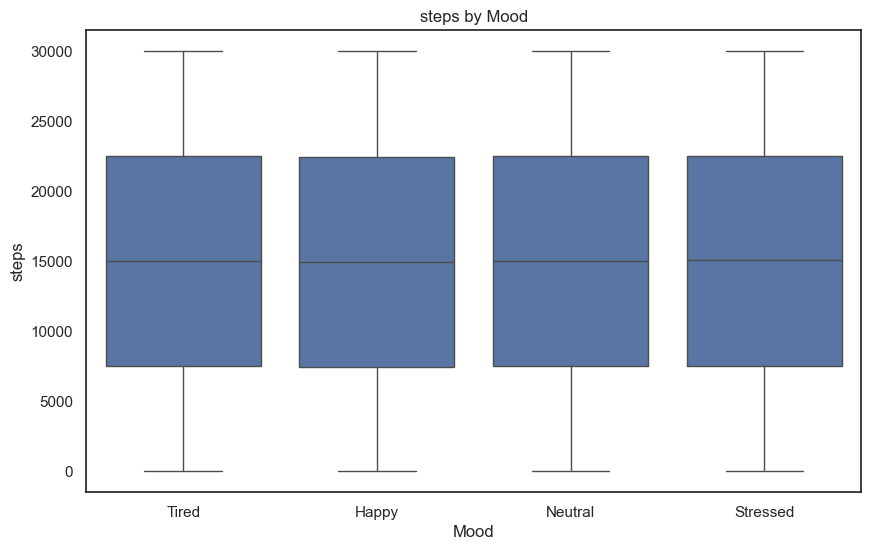

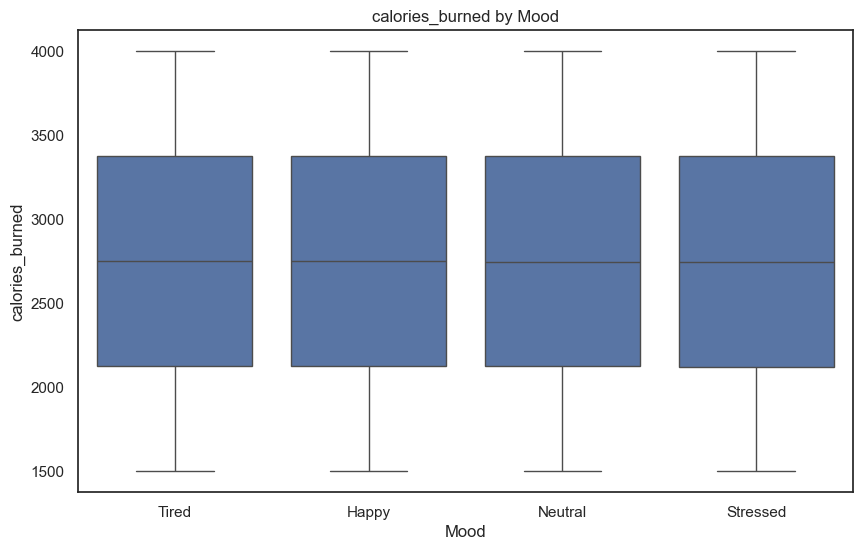

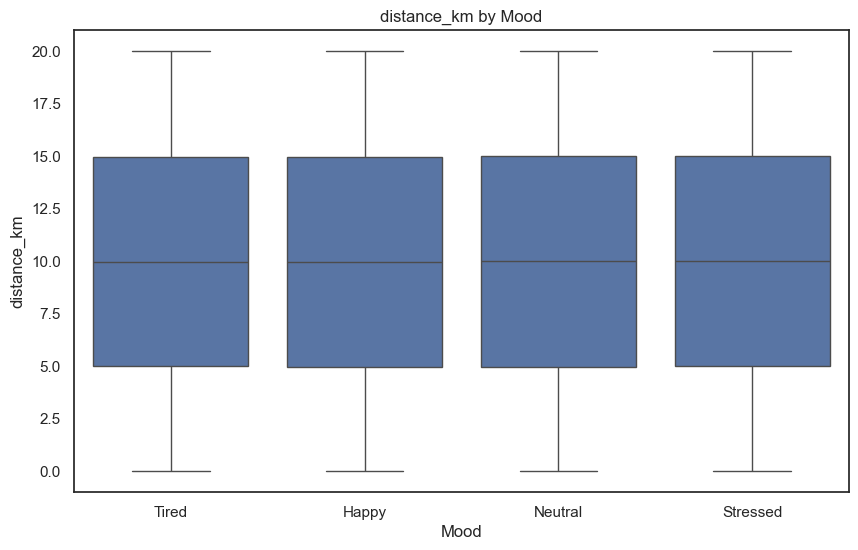

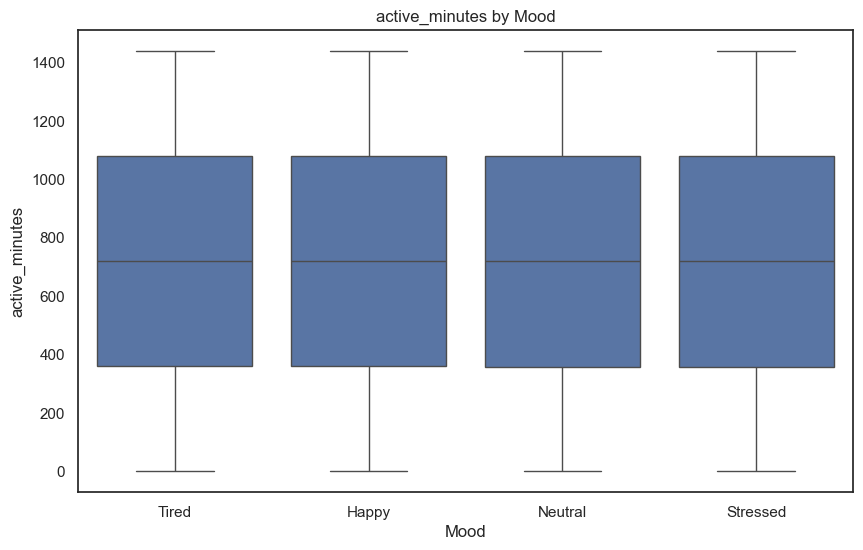

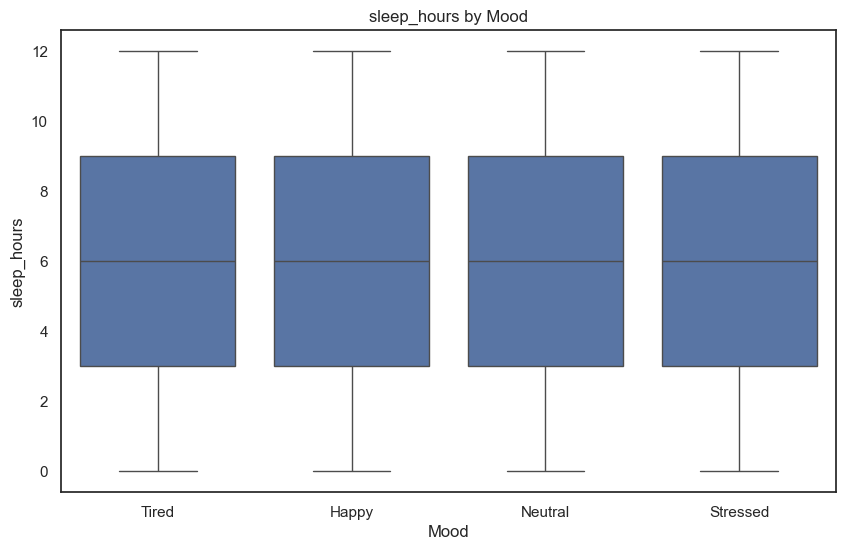

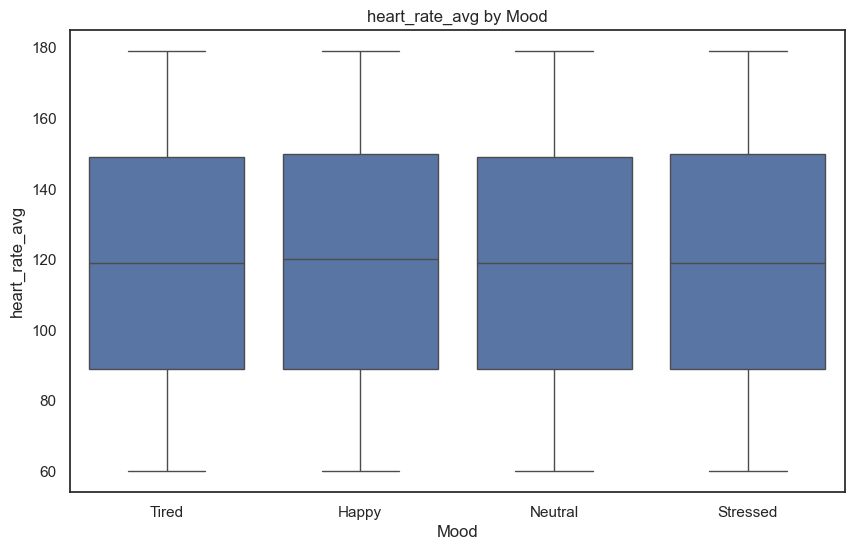

In [14]:
for col in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='mood', y=col, data=df)
    plt.title(f'{col} by Mood')
    plt.xlabel('Mood')
    plt.ylabel(col)
    plt.show()

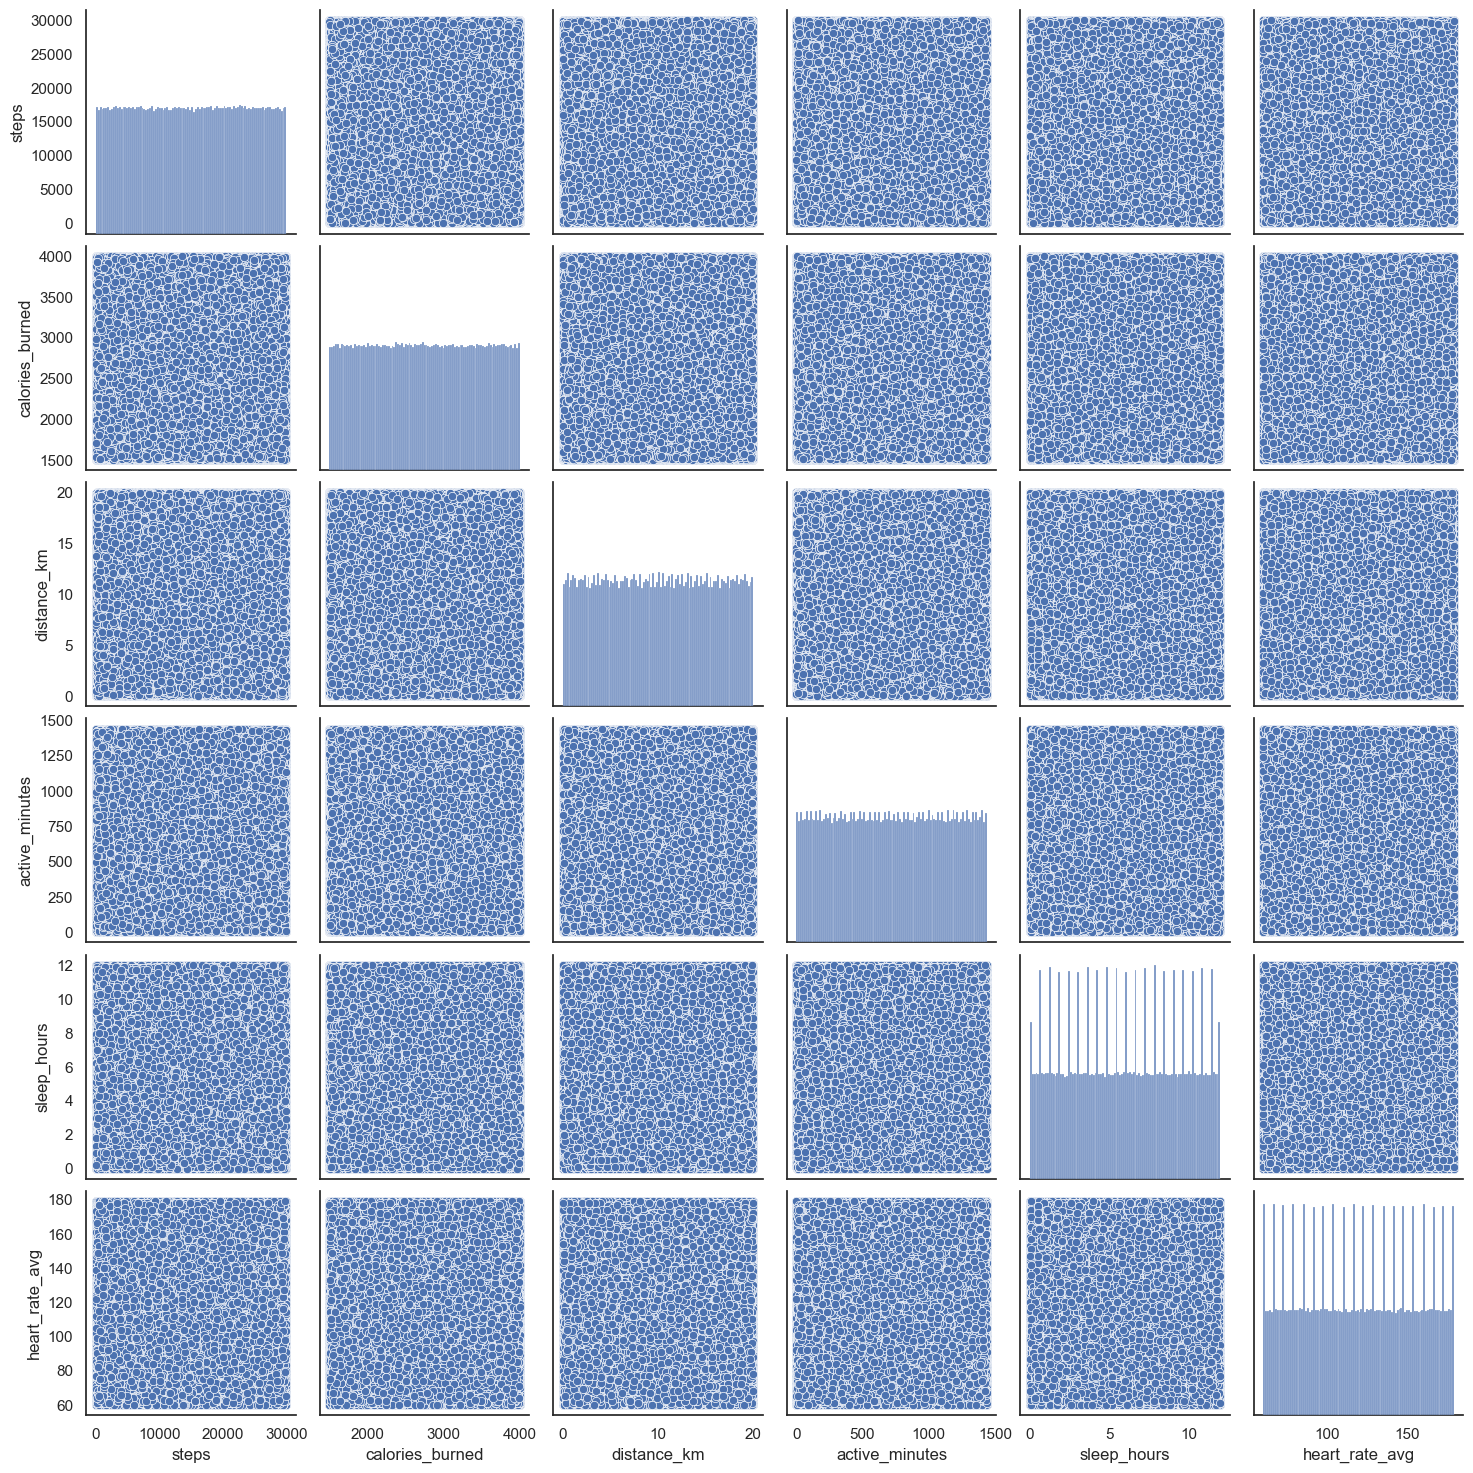

In [15]:
sns.pairplot(df)
plt.show()

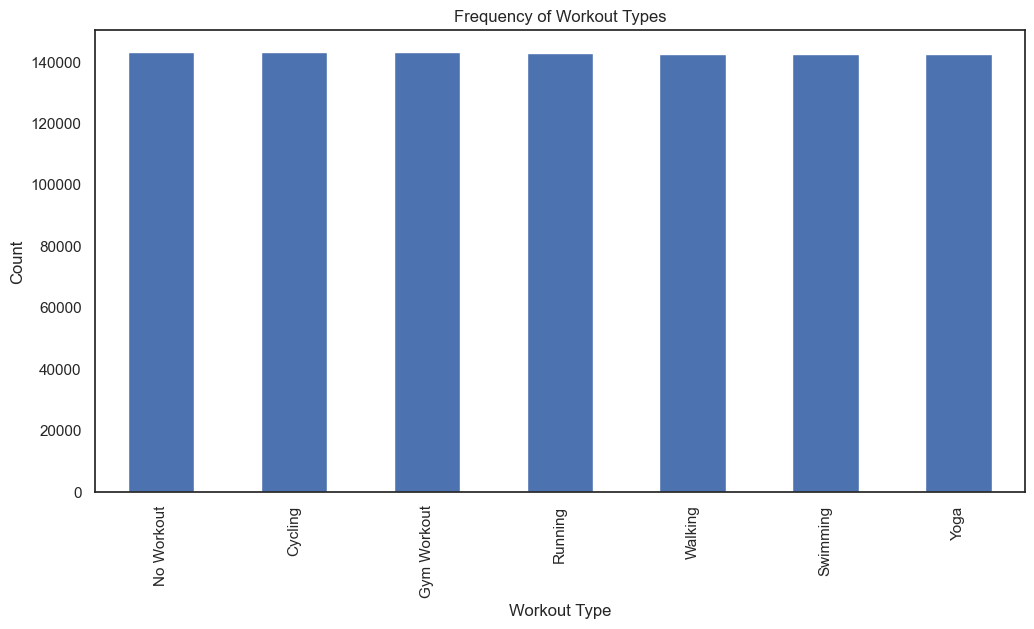

In [16]:
plt.figure(figsize=(12, 6))
df['workout_type'].value_counts().plot(kind='bar')
plt.title('Frequency of Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.show()

In [17]:
mood_weather_ct = pd.crosstab(df['mood'], df['weather_conditions'])
print("\nCross-tabulation of Mood and Weather Conditions:")
print(mood_weather_ct)


Cross-tabulation of Mood and Weather Conditions:
weather_conditions  Clear    Fog   Rain   Snow
mood                                          
Happy               62712  62651  62664  62627
Neutral             62368  62374  62662  62439
Stressed            62402  62880  62584  62341
Tired               62325  62512  62149  62310


In [19]:
X = df[['steps']]
y = df['calories_burned']

In [20]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
print("\nLinear Regression Model to Predict Calories Burned from Steps:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for 'steps': {model.coef_[0]}")


Linear Regression Model to Predict Calories Burned from Steps:
Intercept: 2749.9599259917927
Coefficient for 'steps': 3.213559694121338e-06


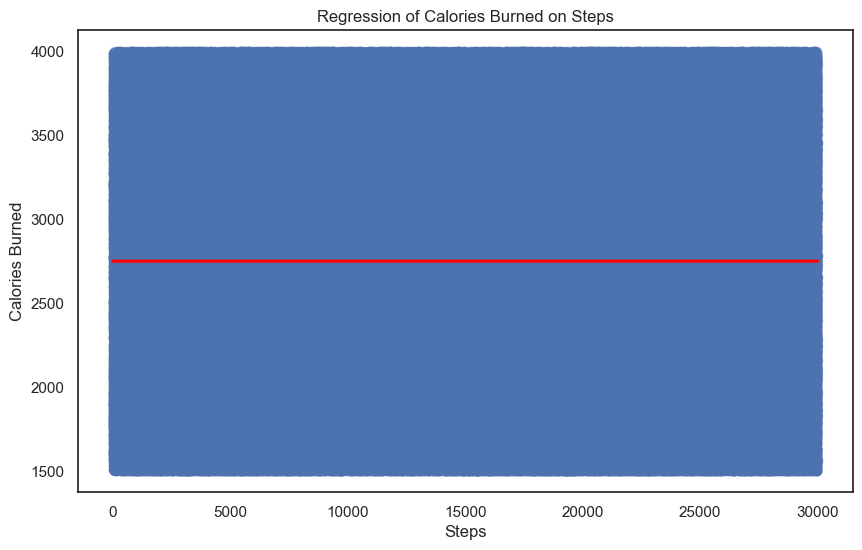

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='steps', y='calories_burned', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Regression of Calories Burned on Steps')
plt.xlabel('Steps')
plt.ylabel('Calories Burned')
plt.show()